In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer


In [2]:
# Step 1: Distance function
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Step 2: Calculate distance matrix
def distance_matrix(points):
    n = len(points)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean(points[i], points[j])
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

# Step 3: Hierarchical Clustering (Agglomerative + Single Linkage)
def hierarchical_clustering(points, target_clusters=1):
    clusters = [[i] for i in range(len(points))]  # each point is a cluster
    dist_matrix = distance_matrix(points)

    while len(clusters) > target_clusters:
        # Find closest pair of clusters
        min_dist = np.inf
        pair = (0, 1)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Single linkage: min distance between any two points
                d = min(euclidean(points[p1], points[p2])
                        for p1 in clusters[i] for p2 in clusters[j])
                if d < min_dist:
                    min_dist = d
                    pair = (i, j)

        # Merge the clusters
        c1, c2 = pair
        new_cluster = clusters[c1] + clusters[c2]
        clusters = [clusters[i] for i in range(len(clusters)) if i not in pair]
        clusters.append(new_cluster)

    return clusters

In [15]:
# fetching data
df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/market_basket_large.csv")

In [16]:
# converting data to numerical values
df['Items'] = df['Items'].str.split(',')

mlb = MultiLabelBinarizer()
one_hot = mlb.fit_transform(df['Items'])

one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_, index=df.index)

df = pd.concat([df.drop(columns=['Items']), one_hot_df], axis=1)

# Display result
df = df[:100]
df.head()


,TransactionID,Apples,Bananas,Beef,Bread,Butter,Carrots,Cereal,Cheese,Chicken,...,Lettuce,Milk,Onions,Pasta,Peanut Butter,Rice,Soda,Tea,Tomatoes,Yogurt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# converting to numpy array
points = df.to_numpy()

In [19]:
# training model
final_clusters = hierarchical_clustering(points, target_clusters=2)

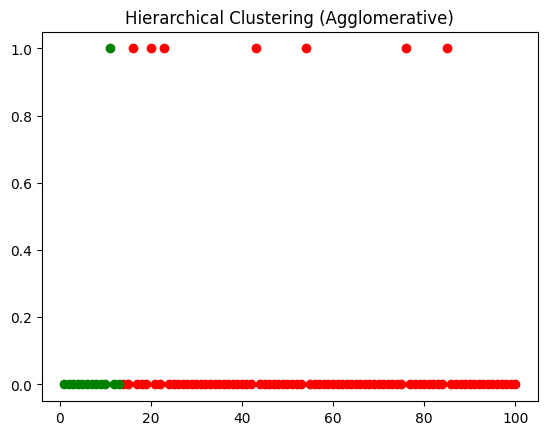

In [20]:
# Visualize
colors = ['r', 'g', 'b', 'c', 'm']
for i, cluster in enumerate(final_clusters):
    for index in cluster:
        plt.scatter(points[index][0], points[index][1], color=colors[i])
plt.title("Hierarchical Clustering (Agglomerative)")
plt.show()